# **🚗** **The** **Cars** **dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

We are dealing with a car dataset and want to predict whether a car is expensive or cheap.

In [ ]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv"

ℹ️ The dataset description is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt).

In [ ]:
df = pd.read_csv(url)
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


In [ ]:
df.shape

(205, 9)

# **🛠** **Preprocessing** **Workflow**

In [ ]:
# Let's check if there are any duplicates?
duplicate_count = df.duplicated().sum()
duplicate_count

14

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(191, 9)

In [ ]:
# What is the percentage of missing values?
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

enginelocation    5.235602
carwidth          1.047120
aspiration        0.000000
curbweight        0.000000
enginetype        0.000000
cylindernumber    0.000000
stroke            0.000000
peakrpm           0.000000
price             0.000000
dtype: float64

In [ ]:
# carwidth has several missing values: np.nans and '*'. Since missing values make up less than 30% of the data, we'll apply strategy='median'

from sklearn.impute import SimpleImputer
df = df.replace('*', np.nan)
carwidth_imputer = SimpleImputer(strategy="median")
carwidth_imputer.fit(df[['carwidth']])
df['carwidth'] = carwidth_imputer.transform(df[['carwidth']])

In [ ]:
# Given that enginelocation is a categorical feature, and the vast majority of categories belong to 'front', we'll apply strategy='most_frequent'

engine_imputer = SimpleImputer(strategy = 'most_frequent')
engine_imputer.fit(df[['enginelocation']])
df['enginelocation'] = engine_imputer.transform(df[['enginelocation']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      191 non-null    object 
 1   enginelocation  191 non-null    object 
 2   carwidth        191 non-null    float64
 3   curbweight      191 non-null    int64  
 4   enginetype      191 non-null    object 
 5   cylindernumber  191 non-null    object 
 6   stroke          191 non-null    float64
 7   peakrpm         191 non-null    int64  
 8   price           191 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 13.6+ KB


In [ ]:
# Numerical characteristics of the dataset that we need to scale.
numerical_features = df.select_dtypes(exclude=['object']).columns
numerical_features

Index(['carwidth', 'curbweight', 'stroke', 'peakrpm'], dtype='object')

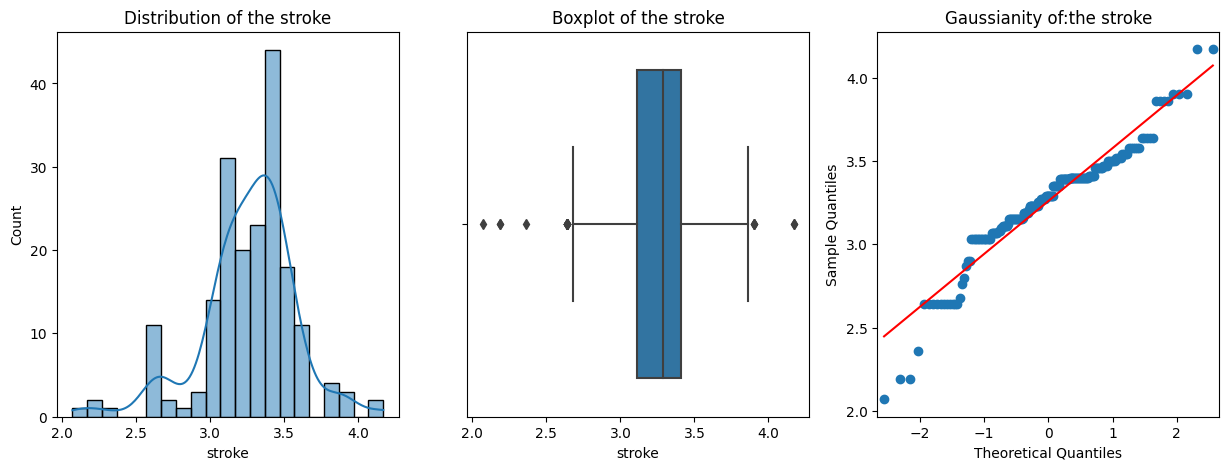

In [ ]:
# peakrpm, carwidth, & stroke have a normal distribution, but also have some outliers. Therefore, it is recommended to use RobustScaler().

variable = 'stroke'
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the {variable}")
sns.histplot(data = df,x = f"{variable}", kde = True, ax = ax[0])

ax[1].set_title(f"Boxplot of the {variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of:the {variable}")
qqplot(df[f"{variable}"],line='s',ax=ax[2]);

In [ ]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
df['peakrpm'],df['carwidth'],df['stroke'] = rb_scaler.fit_transform(df[['peakrpm','carwidth','stroke']]).T
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,2548,dohc,four,-2.033333,-0.142857,expensive
1,std,front,0.000000,2823,ohcv,six,0.600000,-0.142857,expensive
2,std,front,0.000000,2337,ohc,four,0.366667,0.571429,expensive
3,std,front,0.333333,2824,ohc,five,0.366667,0.571429,expensive
4,std,front,0.296296,2507,ohc,five,0.366667,0.571429,expensive


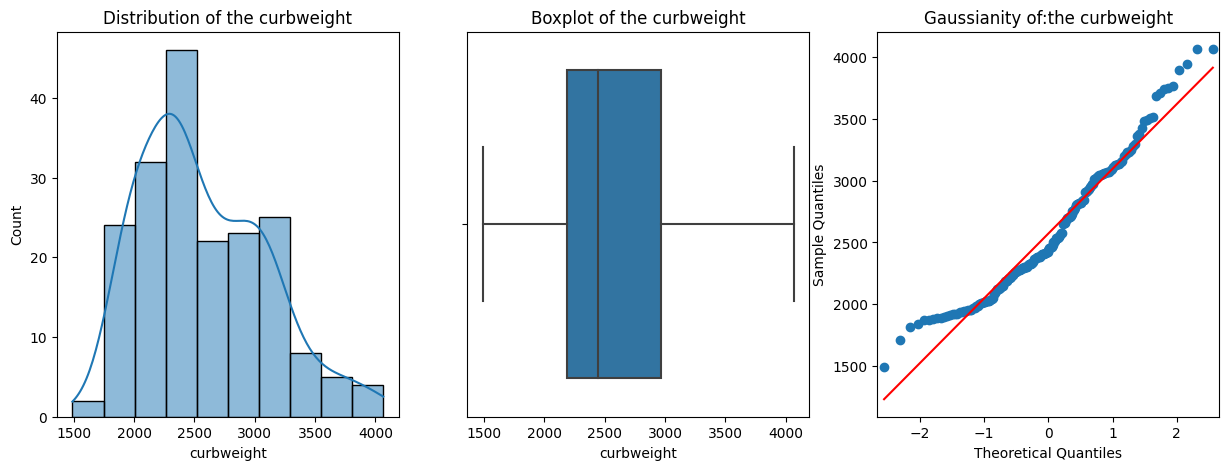

In [ ]:
# curbweight has a normal distribution and no outliers. We will use StandardScaler().

variable = 'curbweight'

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot of the {variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of:the {variable}")
qqplot(df[f"{variable}"],line='s',ax=ax[2]);

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df['curbweight'] = std_scaler.fit_transform(df[['curbweight']])
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
1,std,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
2,std,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
3,std,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
4,std,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


In [ ]:
# aspiration and enginelocation are binary categorical features.

from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
df['aspiration'], df['enginelocation'] = binary_encoder.fit_transform(df[['aspiration', 'enginelocation']]).T

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
1,0.0,0.0,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
2,0.0,0.0,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
3,0.0,0.0,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
4,0.0,0.0,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


In [ ]:
# enginetype is a multi-categorical predictor. We will use OneHotEncoder().

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['enginetype']])
enginetype_encoded = ohe.transform(df[['enginetype']])

df[ohe.get_feature_names_out()] = enginetype_encoded
df.drop(columns='enginetype', inplace = True)
df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.518519,-0.048068,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.333333,0.478302,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,-0.126260,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,1.259259,0.722416,four,-0.466667,0.428571,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,1.0,0.0,1.222222,0.907408,four,-0.466667,0.285714,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
188,0.0,0.0,1.259259,0.836844,six,-1.400000,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,1.0,0.0,1.259259,1.227807,six,0.366667,-0.428571,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df['cylindernumber'] = df['cylindernumber'].map({'four': 4,
                                                 'six': 6,
                                                 "five":5,
                                                 'three': 3,
                                                 'twelve':12,
                                                 'two':2,
                                                 'eight':8})
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.518519,-0.048068,4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.476395,6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,-0.450474,4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.333333,0.478302,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,-0.126260,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<Axes: xlabel='cylindernumber', ylabel='Count'>

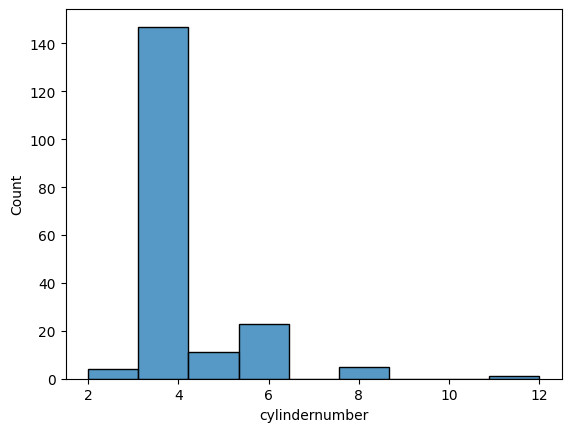

In [ ]:
sns.histplot(data = df, x = df['cylindernumber'])


In [ ]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()

df['cylindernumber'] = rb_scaler.fit_transform(df[['cylindernumber']])

df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.518519,-0.048068,0.0,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.476395,2.0,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,-0.450474,0.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.333333,0.478302,1.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,-0.126260,1.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

df['price'] = LabelEncoder().fit_transform(df['price'])
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.518519,-0.048068,0.0,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.476395,2.0,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,-0.450474,0.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.333333,0.478302,1.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,-0.126260,1.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **Base** **Modelling**
🎯 Our goal is to predict whether a car will be expensive or cheap based on certain characteristics.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['price'])
y = df['price']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=10)
base_model_score = scores.mean()

base_model_score

0.8797368421052632

**Let's see which predictors will be the most significant?**

<Axes: >

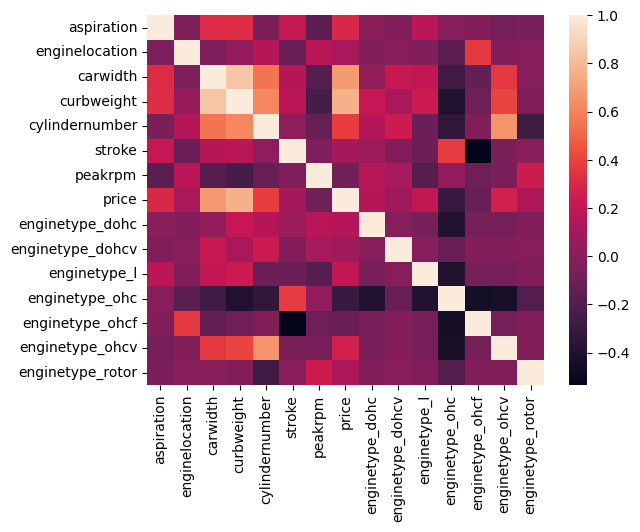

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns )

In [ ]:
from numpy.ma.core import correlate
corr_df = corr.unstack().reset_index()
corr_df.columns = ['feature_1','feature_2', 'correlation']
corr_df.sort_values(by="correlation",ascending=False, inplace=True)
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']]
corr_df

,feature_1,feature_2,correlation
47,curbweight,carwidth,0.847498
33,carwidth,curbweight,0.847498
52,curbweight,price,0.767866
108,price,curbweight,0.767866
37,carwidth,price,0.679997
...,...,...,...
206,enginetype_ohcv,enginetype_ohc,-0.436077
177,enginetype_ohc,enginetype_ohcf,-0.453815
191,enginetype_ohcf,enginetype_ohc,-0.453815
87,stroke,enginetype_ohcf,-0.534229


**Feature Selection (with Permutation Importance)**

Let's perform 'feature permutation' to determine which predictors contribute the least amount of information to the model.

In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

# Model evaluation without feature permutation
model = LogisticRegression()
cv_results = cross_validate(model, X, y, cv = 5)

score = cv_results["test_score"].mean()
print(f"Before any feature permutation, the cross-validated accuracy is equal to {round(score,2)}")

# Permutation importance
model = LogisticRegression().fit(X,y)
permutation_score = permutation_importance(model, X, y, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T,
                            columns = ['feature','feature_importance'])

print("After feature permutation, here are the decreases in terms of scores:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False)
importance_df

Before any feature permutation, the cross-validated accuracy is equal to 0.84
After feature permutation, here are the decreases in terms of scores:


,feature,feature_importance
3,curbweight,0.293351
2,carwidth,0.107696
5,stroke,0.028482
11,enginetype_ohcf,0.016963
10,enginetype_ohc,0.015236
6,peakrpm,0.015131
13,enginetype_rotor,0.011257
4,cylindernumber,0.008901
0,aspiration,0.007068
7,enginetype_dohc,0.005026


In [ ]:
# We will use the most significant predictors for prediction
threshold = 0.05
weak_features = importance_df[importance_df.feature_importance <= threshold]["feature"].values
weak_features

array(['stroke', 'enginetype_ohcf', 'enginetype_ohc', 'peakrpm',
       'enginetype_rotor', 'cylindernumber', 'aspiration',
       'enginetype_dohc', 'enginetype_ohcv', 'enginelocation',
       'enginetype_dohcv', 'enginetype_l'], dtype=object)

In [ ]:
X_strong_features = df.drop(columns=list(weak_features) + ["price"])

print(f"Our strong features are {list(X_strong_features.columns)}")

model = LogisticRegression()

scores = cross_val_score(model, X_strong_features, y, cv = 5)
strong_model_score = scores.mean()

print(f"Before removing weak features, the cross-validated accuracy was equal to {round(score,2)}")

print(f"The LogisticRegression fitted with the strong features only has a score of {round(strong_model_score,2)}")


Our strong features are ['carwidth', 'curbweight']
Before removing weak features, the cross-validated accuracy was equal to 0.84
The LogisticRegression fitted with the strong features only has a score of 0.91


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

X = X_strong_features
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.896551724137931

In [ ]:
model.coef_

array([[1.96895542, 2.68127465]])

In [ ]:
model.intercept_

array([0.49849857])

In [ ]:
model.classes_

array([0, 1])

In [ ]:
# Let's make a prediction for a car with the following characteristics
model.predict_proba([[63.8,1875]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0., 1.]])